In [1]:

from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


print("Kształt danych treingnowych:", x_train.shape)  
print("Kształt danych testowych:", x_test.shape)   


Kształt danych treingnowych: (60000, 28, 28)
Kształt danych testowych: (10000, 28, 28)


In [6]:
#dane z ubraniami, podzielone na 10 klas (0. - t-shirty, 1. - spodnie, 2. - pullovery, 3. - sukienki, 4. - płaszcze, 5. - sandały, 6. - koszule, 7. - trampki, 8. - tobry i 9. - botki)
#normalizacja danych
x_train = x_train.astype("float32") / 255.0#ułatwiamy trening sieci
x_test = x_test.astype("float32") / 255.0

# 3. Dodanie kanału (dla CNN)
x_train = np.expand_dims(x_train, -1)  # (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# 4. One-hot encoding etykiet
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [8]:

#tworzymy model CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

print("Kształty danych do sprawdzenia\n")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)



Kształty danych do sprawdzenia

x_train: (60000, 28, 28, 1)
y_train: (60000, 10)
x_test: (10000, 28, 28, 1)
y_test: (10000, 10)


In [ ]:
'''Zgadzają się dlatego możemy przejść dalej
'''

In [9]:
#kompilujemy go
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
#trening modelu
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)


Epoch 1/10
375/375 - 5s - 14ms/step - accuracy: 0.9122 - loss: 0.2411 - val_accuracy: 0.9193 - val_loss: 0.2220
Epoch 2/10
375/375 - 5s - 14ms/step - accuracy: 0.9164 - loss: 0.2282 - val_accuracy: 0.9190 - val_loss: 0.2206
Epoch 3/10
375/375 - 5s - 14ms/step - accuracy: 0.9190 - loss: 0.2187 - val_accuracy: 0.9202 - val_loss: 0.2149
Epoch 4/10
375/375 - 5s - 14ms/step - accuracy: 0.9211 - loss: 0.2108 - val_accuracy: 0.9204 - val_loss: 0.2185
Epoch 5/10
375/375 - 5s - 13ms/step - accuracy: 0.9240 - loss: 0.2028 - val_accuracy: 0.9197 - val_loss: 0.2243
Epoch 6/10
375/375 - 5s - 14ms/step - accuracy: 0.9266 - loss: 0.1965 - val_accuracy: 0.9186 - val_loss: 0.2251
Epoch 7/10
375/375 - 6s - 16ms/step - accuracy: 0.9307 - loss: 0.1869 - val_accuracy: 0.9201 - val_loss: 0.2218
Epoch 8/10
375/375 - 9s - 23ms/step - accuracy: 0.9327 - loss: 0.1819 - val_accuracy: 0.9217 - val_loss: 0.2157
Epoch 9/10
375/375 - 11s - 28ms/step - accuracy: 0.9351 - loss: 0.1743 - val_accuracy: 0.9199 - val_loss

In [ ]:
'''Model stopniowo poprawiał swoją dokładność i zmniejszał straty zarówno na zbiorze treningowym, jak i walidacyjnym, co świadczy o skutecznym uczeniu się i dobrej ogólnej zdolności generalizacji bez oznak przeuczenia
'''

Test accuracy: 0.9097
Test loss: 0.2570


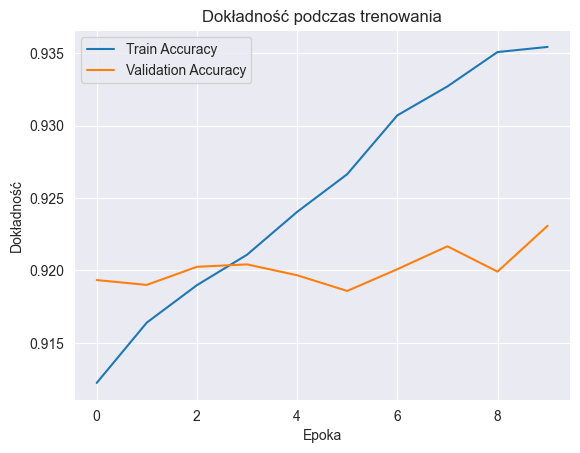

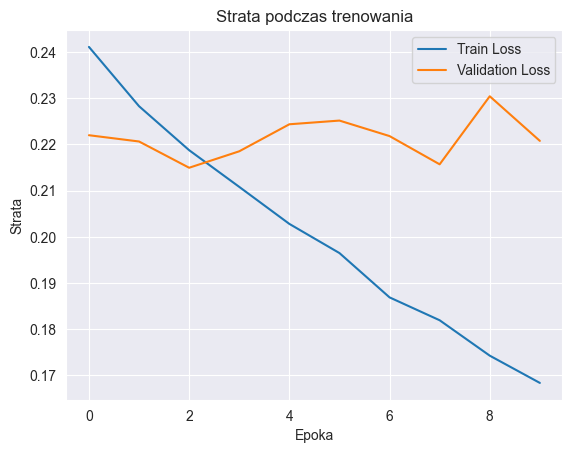

In [13]:
#ocena modelu na danych testowych
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")
import matplotlib.pyplot as plt

#dokładność
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Dokładność podczas trenowania')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

#strata
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Strata podczas trenowania')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()


In [ ]:
'''model poprawnie klasyfikuje około 90% przykładów ze zbioru testowego, co oznacza, że osiąga wysoką skuteczność i dobrze generalizuje na danych, których nie widział podczas treningu
'''

In [ ]:
'''funkcja straty-miara „błędu” modelu jest stosunkowo niska, co potwierdza, że model nie tylko jest dokładny, ale i pewny swoich prognoz
'''

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.88      0.83      0.86      1000
           3       0.90      0.91      0.91      1000
           4       0.84      0.88      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.73      0.74      0.73      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



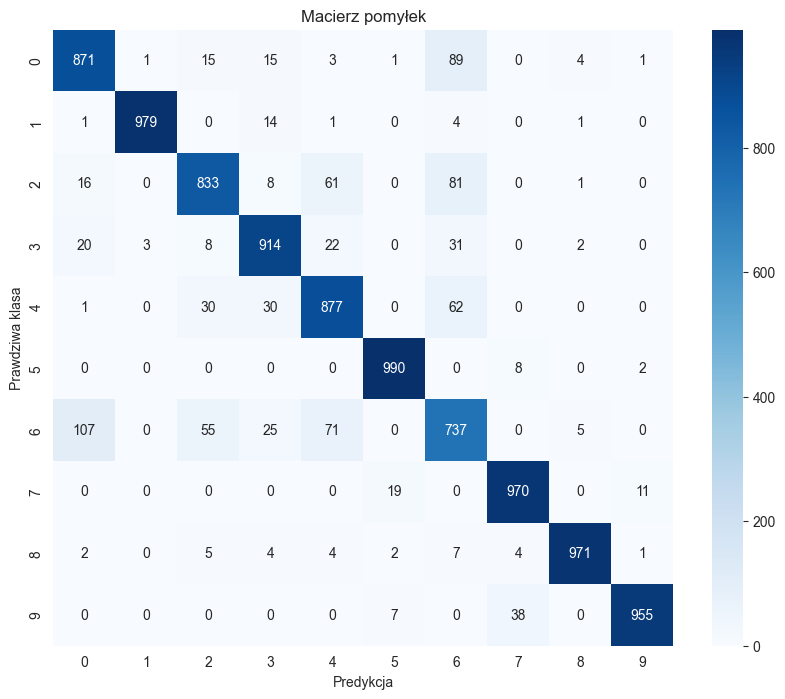

In [14]:

#predykcja klas
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

#raport klasyfikacji
print("Raport klasyfikacji:")
print(classification_report(y_true, y_pred_classes))

#macierz pomyłek
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predykcja')
plt.ylabel('Prawdziwa klasa')
plt.title('Macierz pomyłek')
plt.show()


In [ ]:
'''Model osiągnął wysoką ogólną dokładność, co wskazuje na skuteczne rozpoznawanie większości klas, jednak istnieją zauważalne różnice między kategoriami.

Najlepsze wyniki uzyskano dla klas: 1, 5 , 8, 9 - ukazują wyniki pracyzji oraz F1, okazują one niemal bezbłędną klasyfikację.

Najsłabsze wyniki osiągnęła klasa:6– F1-score tylko 0.73, co sugeruje trudności w odróżnieniu jej od podobnych klas'''

In [ ]:
'''Aby zwiększyć wydajność modelu można zwiększyć liczbę epok oraz skupić się na tym skąd wynikaja błędy w klasie 6'''

1 , 5 , 8 , 9  – F1-score w okolicach 0.97–0.99, co oznacza niemal bezbłędną klasyfikację. 6 -Shirt – F1-score tylko 0.73, co sugeruje trudności w odróżnieniu jej od podobnych klas (np. 0, 2, 4)